<a href="https://colab.research.google.com/github/mattsmiths/SICBCV2025/blob/main/Image_processing_SICB_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SICB 2025: Computer Vision Workshop

## Image processing example

The following code will make a copy "clone" of the Github Repository where we have saved the material for the demo. This is using unix commands, thus we add a "!" to indicate such.

In [8]:
!git clone https://github.com/mattsmiths/SICBCV2025

Cloning into 'SICBCV2025'...
remote: Enumerating objects: 28, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 28 (delta 10), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (28/28), 8.37 MiB | 31.99 MiB/s, done.
Resolving deltas: 100% (10/10), done.


Now we will import some helpful Python libraries for image processing:

*   OpenCV: a comprehensive computer vision library
*   Numpy: library for numerical operations


In [13]:
import cv2 as cv
import numpy as np
import os
from matplotlib import pyplot as plt

After cloning the Github Repository there should be an image located in the local directory of your Github. We'll check that with a command below:

In [12]:
if os.path.isfile('/content/SICBCV2025/DJI_0418.JPG') is True:
  print('Yes, there is a file there!')
else:
  print('No, there is not a file there :(')

Yes, there is a file there!


Now let's try to read in the image using the OpenCV library

In [16]:
# saving the filepath as a string variable
filepath1 = '/content/SICBCV2025/DJI_0418.JPG'

In [17]:
# using the OpenCV function "cv.imread", that will read an image file into your Python environment
# we pass that function our string variable inbetween the parenthesis
image_1 = cv.imread(filepath1)

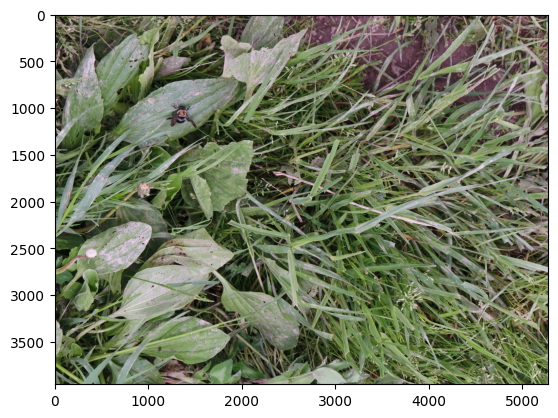

In [20]:
# now we can visualize that image using the matplotlib library
plt.imshow(image_1[:,:,::-1])

In [23]:
from google.colab.patches import cv2_imshow

Text(0, 0.5, 'This is the y-axis')

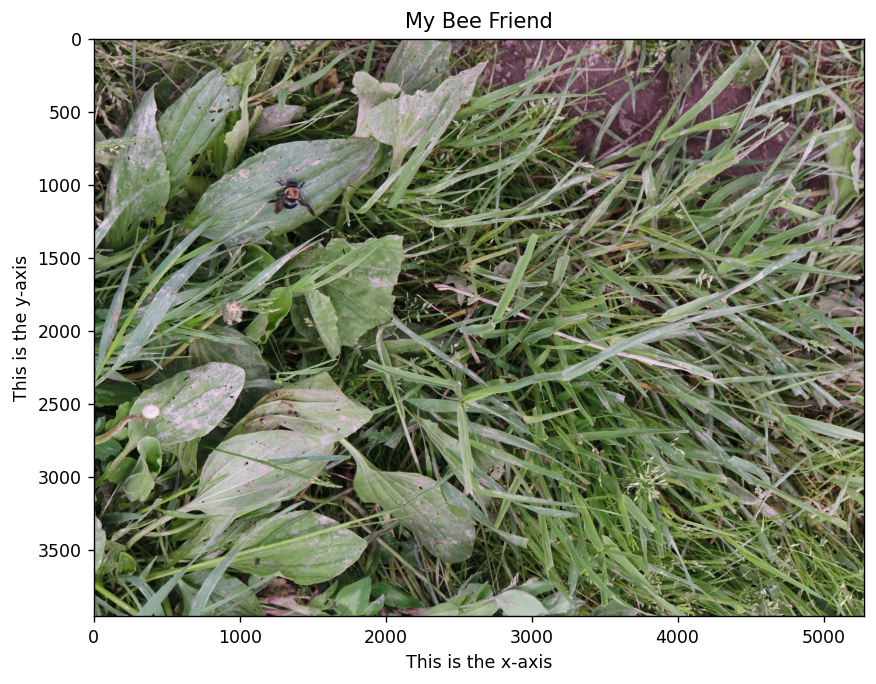

In [29]:
# create a predefined figure window of width=8, height=6, dpi=125
plt.figure(figsize=(8,6),dpi=125)

# within that window plot your image
plt.imshow(image_1[:,:,::-1])

# add a title!
plt.title('My Bee Friend',fontsize=12)

# add axis labels
plt.xlabel('This is the x-axis')
plt.ylabel('This is the y-axis')

Above you should see a picture of a bee (carpenter bee?) on a background of green leaves!

Now let's dive into how this image is actually represented in Python and how we can manipulate the image to isolate features of interest

In [30]:
# Typing the variable name will display what information this variable represents
image_1

array([[[177, 175, 175],
        [177, 175, 175],
        [177, 179, 179],
        ...,
        [149, 145, 144],
        [151, 147, 146],
        [149, 145, 144]],

       [[182, 180, 180],
        [182, 180, 180],
        [179, 181, 181],
        ...,
        [149, 145, 144],
        [151, 147, 146],
        [152, 148, 147]],

       [[182, 182, 182],
        [183, 183, 183],
        [177, 181, 182],
        ...,
        [150, 146, 145],
        [151, 147, 146],
        [153, 149, 148]],

       ...,

       [[ 93, 162, 125],
        [ 90, 159, 122],
        [ 98, 166, 131],
        ...,
        [ 99, 141, 124],
        [ 96, 141, 124],
        [ 90, 138, 120]],

       [[ 92, 161, 124],
        [ 94, 163, 126],
        [ 99, 167, 132],
        ...,
        [ 97, 141, 124],
        [ 97, 142, 125],
        [ 90, 138, 120]],

       [[ 88, 157, 120],
        [ 93, 162, 125],
        [ 99, 167, 132],
        ...,
        [ 95, 139, 122],
        [ 94, 142, 124],
        [ 91, 141, 123]]

*  Here we see that there are numbers representing the above image! These values represent pixels, or the smallest value of an image. Each pixel has a value of 0 - 255, with the higher the value the higher the intensity

*  In this example there are 3 different color channels: blue, green, and red. Each pixel has an associated intensity value for each of these colors  


In [33]:
# We can see how pixels are represented by determining the shape of the image
# we've just read %%

shape_1 = np.shape(image_1)
print('The shape of the image is:',shape_1)
print('The height: ',shape_1[0])
print('The width: ',shape_1[1])
print('The number of channels: ',shape_1[2])

The shape of the image is: (3956, 5280, 3)
The height:  3956
The width:  5280
The number of channels:  3


In [34]:
blueChannel = image_1[:,:,0] # blues
greenChannel = image_1[:,:,1] # greens
redChannel = image_1[:,:,2] # reds

Text(0.5, 1.0, 'Red Channel')

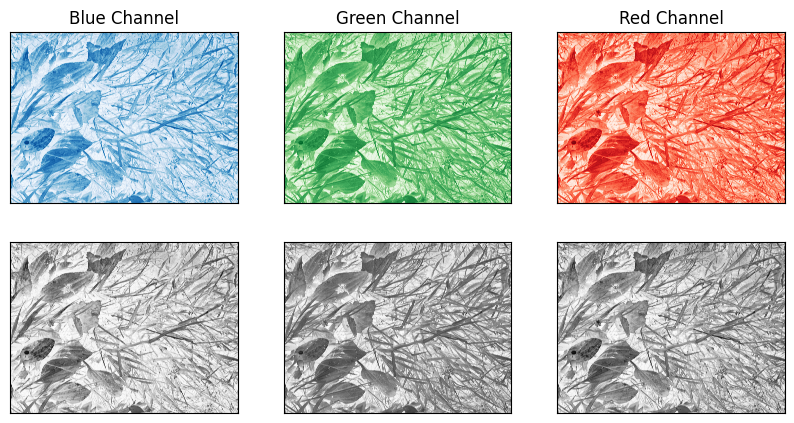

In [61]:
fig,ax = plt.subplots(2,3,figsize=(10,5))
ax[0,0].imshow(blueChannel,cmap=plt.cm.Blues,vmin=0,vmax=255)
ax[0,1].imshow(greenChannel,cmap=plt.cm.Greens,vmin=0,vmax=255)
ax[0,2].imshow(redChannel,cmap=plt.cm.Reds,vmin=0,vmax=255)

ax[1,0].imshow(blueChannel,cmap=plt.cm.Grays,vmin=0,vmax=255)
ax[1,1].imshow(greenChannel,cmap=plt.cm.Grays,vmin=0,vmax=255)
ax[1,2].imshow(redChannel,cmap=plt.cm.Grays,vmin=0,vmax=255)

for ele in range(0,3):
  for ee in range(0,2):
    axx = ax[ee,ele].set_yticks([])
    axx = ax[ee,ele].set_xticks([])

ax[0,0].set_title('Blue Channel')
ax[0,1].set_title('Green Channel')
ax[0,2].set_title('Red Channel')